# Mecánica Cuántica 1 - 201820
## Tarea \# 3 - Solución
Elaborada por Daniel Forero

In [1]:
from sympy import *
init_printing(use_latex='mathjax')
from IPython.display import display

## Problema 3.4

Nuestra función inicial $\psi(x)$ tiene $\Delta p = \sigma$ y $\langle p \rangle = q$. Si aplicamos una transformación 
$$\phi(x)=\exp\left(\frac{ip_0x}{\hbar}\right) \psi(x).\ \ \ p_0 = \hbar k_0$$ 
Esta transformada de Fourier se escribiría $$\hat{\phi}(k) = \int_{-\infty}^{\infty}\exp(ik_0x) \psi(x)\exp(-ikx)dk,$$

$$\hat{\phi}(k) = \int_{-\infty}^{\infty}\psi(x)\exp(-i(k-k_0)x)dk,\ \ \ k-k_0 = k'$$

$$\hat{\phi}(k'+k_0) = \int_{-\infty}^{\infty}\psi(x)\exp(-ik'x)dk'$$

De esta forma vemos que la transformación en el espacio es equivalente a una translación en espacio de momentum. Esta translación, claramente, afecta el valor esperado, ya que la distribución se encuentra ahora centrada en $q+p_0$. Este será el valor esperado.

Por otro lado, la translación no modifica la forma de la distribución, de manera que $\Delta p = \sigma$.

## Problema 3.6

In [2]:
A,B,C,D = symbols('A B C D')
q, k, x, a = symbols('q k x a', real=True)
psi_1 = exp(I*k*x) + A*exp(-I*k*x)
psi_2 = B*exp(I*q*x) + C*exp(-I*q*x)
psi_3 = D*exp(I*k*x)
# En x = -a
step_1=simplify(psi_1.subs(x,-a)-psi_2.subs(x,-a))
display('En x= -a',Eq(step_1,0))
step_1d=simplify(diff(psi_1,x).subs(x,-a)\
                 -diff(psi_2,x).subs(x,-a))
display('En x= -a',Eq(step_1d,0))
# En x = a
step_11=simplify(psi_2.subs(x,a)-psi_3.subs(x,a))
display('En x= a',Eq(step_11,0))
step_11d=simplify(diff(psi_2,x).subs(x,a)\
                  -diff(psi_3,x).subs(x,a))
display('En x= a',Eq(step_11d,0))


'En x= -a'

   ⅈ⋅a⋅k      -ⅈ⋅a⋅q      ⅈ⋅a⋅q    -ⅈ⋅a⋅k    
A⋅ℯ      - B⋅ℯ       - C⋅ℯ      + ℯ       = 0

'En x= -a'

         ⅈ⋅a⋅k          -ⅈ⋅a⋅q          ⅈ⋅a⋅q        -ⅈ⋅a⋅k    
- ⅈ⋅A⋅k⋅ℯ      - ⅈ⋅B⋅q⋅ℯ       + ⅈ⋅C⋅q⋅ℯ      + ⅈ⋅k⋅ℯ       = 0

'En x= a'

   ⅈ⋅a⋅q      -ⅈ⋅a⋅q      ⅈ⋅a⋅k    
B⋅ℯ      + C⋅ℯ       - D⋅ℯ      = 0

'En x= a'

       ⅈ⋅a⋅q          -ⅈ⋅a⋅q          ⅈ⋅a⋅k    
ⅈ⋅B⋅q⋅ℯ      - ⅈ⋅C⋅q⋅ℯ       - ⅈ⋅D⋅k⋅ℯ      = 0

In [3]:
sols =solve([step_1, step_1d, step_11, step_11d])[0]

In [4]:
R = trigsimp(expand(sols[A]*conjugate(sols[A]))\
             .rewrite(sin)).collect(cos(4*a*q))
display(Eq(Symbol('R'),R))

                    2        2                          
            (-k + q) ⋅(k + q) ⋅(cos(4⋅a⋅q) - 1)         
R = ────────────────────────────────────────────────────
       4      2  2    4   ⎛ 4      2  2    4⎞           
    - k  - 6⋅k ⋅q  - q  + ⎝k  - 2⋅k ⋅q  + q ⎠⋅cos(4⋅a⋅q)

$$ R = \frac{(k^2-q^2)^2(\cos(4qa)-1)}{-(k^4+(8-2)k^2q^2+q^2)+(k^2-2k^2q^2+q^4)\cos(4qa)}$$

$$ R = \frac{(k^2-q^2)^2(\cos(4qa)-1)}{(k^4-2k^2q^2+q^4)(\cos(4qa)-1) -8k^2q^2}$$

$$ R = \frac{(k^2-q^2)^2(\cos(4qa)-1)}{(k^2-q^2)^2(\cos(4qa)-1) -8k^2q^2}$$

In [5]:
T = trigsimp(expand((sols[D]*conjugate(sols[D]))\
                    .rewrite(sin))).collect(cos(4*a*q))
display(Eq(Symbol('T'),T))


                             2  2                       
                          8⋅k ⋅q                        
T = ────────────────────────────────────────────────────
     4      2  2    4   ⎛   4      2  2    4⎞           
    k  + 6⋅k ⋅q  + q  + ⎝- k  + 2⋅k ⋅q  - q ⎠⋅cos(4⋅a⋅q)

$$ T=\frac{8k^2q^2}{(k^4 + (8-2)k^2q^2 + q^4)-(k^4-2k^2q^2+q^4)\cos(4aq)}$$
$$ T = \frac{8k^2q^2}{8k^2q^2+(k^2-q^2)^2(1-\cos(4aq))} $$



In [6]:
#Comprobamos que se cumpla R+T=1
simplify(R+T)

1

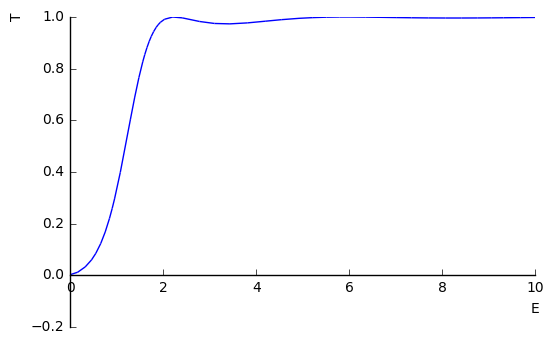

[]

In [7]:
#Para ver que el coeficiente de transmisión se hace 1, lo graficamos.
#Asumimos todas las constantes iguales a 1.
E, m, h, V0 = symbols('E m hbar V_0', real=True,\
                      positive=True)
T_graph=T.subs(k,sqrt(2*m*E/(h**2))).\
subs(q, sqrt(2*m*(E-V0)/(h**2)))\
.subs(m,1).subs(h,1).subs(V0,1).\
subs(a,1)
R_graph=R.subs(k,sqrt(2*m*E/(h**2)))\
.subs(q, sqrt(2*m*(E-V0)/(h**2)))\
.subs(m,1).subs(h,1).subs(V0,1).subs(a,1)
p1=plot(T_graph, label='T', color='b',\
        ylabel='T', xlim=(0,10))
display(solve(T.subs(k,sqrt(2*m*E/(h**2))).\
              subs(q, sqrt(2*m*(E-V0)/(h**2))),E))

In [8]:
#Hallamos para cuales energías se obtiene T=1.
E_T1=solve(Eq(T.subs(k,sqrt(2*m*E/(h**2))).\
              subs(q, sqrt(2*m*(E-V0)/(h**2))),1),E)[0]
display(Eq(E,E_T1))

          2   2
         π ⋅h̅ 
E = V₀ + ──────
            2  
         8⋅a ⋅m

In [9]:
#La profundidad del potencial está dada por
import scipy.constants as sc
N(E_T1.subs(a,0.1e-9).subs(h**2,sc.hbar**2)\
  .subs(m,sc.m_e)-0.7*sc.e) #=0

V₀ + 1.39401446049131e-18

Entonces la profundidad del potencial es
$$ V_0 = -1.39\times10^{-18}J=-8.7\ eV$$

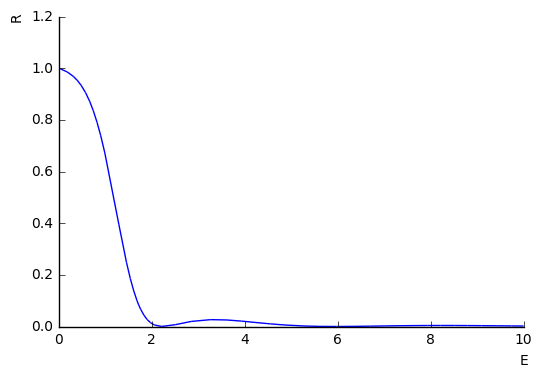

In [10]:
p2=plot(R_graph, label='R', color='r',\
        ylabel='R', xlim=(0,10))


El fenómeno puede explicarse mirando la gráfica del coeficiente de reflexión arriba, cuando lo átomos van muy despacio (baja energía) serán siempre reflejados por la barrera de potencial ($R=1$).